## Example Usage of Hyperparamter search

### Submitting an experment 

In [ ]:
import importlib
import os
from geom3d.dev_scripts import run_training

importlib.reload(run_training)

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
%run src/geom3d/dev_scripts/run_training.py --model_name 'SchNet' --num_molecules 80000 --target_name 'combined' --max_epochs 5 --split "random" --hp_search False

### Plot Hyperparameter importances taken from optuna study

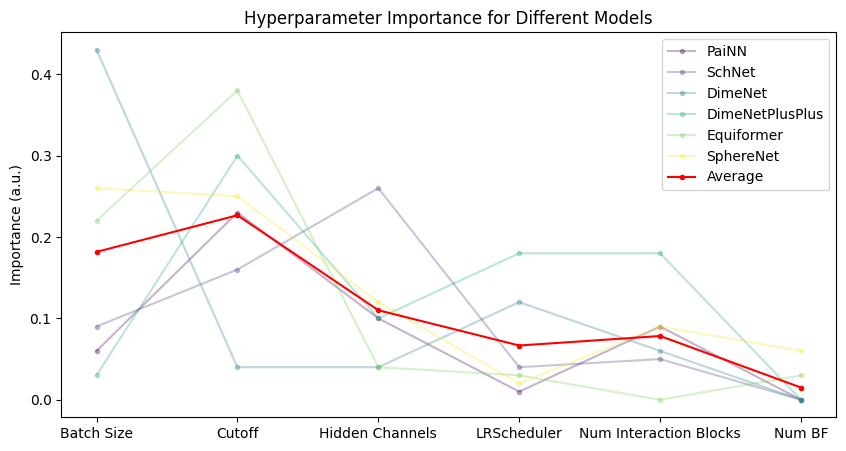

In [16]:
# Plot of hyperparameter importance ffor the different models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Models
models = ['PaiNN', 'SchNet', 'DimeNet', 'DimeNetPlusPlus', 'Equiformer', 'SphereNet']

# Hyperparameters
hyperparameters = ['Batch Size', 'Cutoff', 'Hidden Channels', 'LRScheduler', 'Num Interaction Blocks' , 'Num BF']

# Importance
importance = [[0.06, 0.23, 0.10, 0.01, 0.09, 0], [0.09, 0.16, 0.26, 0.04, 0.05, 0], [0.43, 0.04, 0.04, 0.12, 0.06, 0], [0.03, 0.3, 0.10, 0.18, 0.18, 0], [0.22, 0.38, 0.04, 0.03,0, 0.03], [0.26, 0.25, 0.12, 0.02, 0.09, 0.06]]

# average importance per metric across the models
importance = np.array(importance)
avg_importance = np.mean(importance, axis=0)

colors = cm.viridis(np.linspace(0, 1, len(models)))

# Plot the results
plt.figure(figsize=(10, 5))
for i in range(len(models)):
    plt.plot(hyperparameters, importance[i], label=models[i], color=colors[i], marker='.', alpha=0.3)
plt.plot(hyperparameters, avg_importance, label='Average', color='red', marker='.', alpha=1)
plt.ylabel('Importance (a.u.)')
plt.legend()
plt.title('Hyperparameter Importance for Different Models')
plt.show()



In [2]:
import pandas as pd

# Given data
data = {
    'SchNet': [0.58, 0.47],
    'DimeNet': [0.72, 0.63],
    'DimeNet++': [0.72, 0.67],
    'SphereNet': [0.75, 0.59],
    'PaiNN': [0.52, 0.46],
    'Equiformer': [4.44, 0.38]
}

df = pd.DataFrame(data, index=['Default', 'Optimised'])

# Calculate percentage improvement for each model from default to optimized
percentage_improvement = ((df.loc['Optimised'] - df.loc['Default']) / df.loc['Default']) * 100
improvement_MSE = ((df.loc['Optimised'] - df.loc['Default']))

print("Percentage Improvement from Default to Optimised:")
print(percentage_improvement)

print("\nImprovement in MSE from Default to Optimised:")
print(improvement_MSE)

# Calculate average improvement across all models
average_improvement = percentage_improvement.mean()
average_improvement_MSE = improvement_MSE.mean()

print("\nAverage Percentage Improvement across all models:")
print(average_improvement)

print("\nAverage Improvement in MSE across all models:")
print(average_improvement_MSE)



Percentage Improvement from Default to Optimised:
SchNet       -18.965517
DimeNet      -12.500000
DimeNet++     -6.944444
SphereNet    -21.333333
PaiNN        -11.538462
Equiformer   -91.441441
dtype: float64

Improvement in MSE from Default to Optimised:
SchNet       -0.11
DimeNet      -0.09
DimeNet++    -0.05
SphereNet    -0.16
PaiNN        -0.06
Equiformer   -4.06
dtype: float64

Average Percentage Improvement across all models:
-27.120532999843345

Average Improvement in MSE across all models:
-0.755
